In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#print('hello outliers')
df= pd.read_excel('gastos_costos_20_23.xlsx', index_col=0)
print(df.info())

valores_nulos=df.isnull().sum()
print(valores_nulos)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3342 entries, 2020-01-01 to 2020-12-01
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FOLIO        3153 non-null   object 
 1   UUID         3342 non-null   object 
 2   RFC          3342 non-null   object 
 3   PROVEEDOR    3342 non-null   object 
 4   TIPO GASTO   3342 non-null   object 
 5   GASTO        840 non-null    object 
 6   DESCRIPCION  3342 non-null   object 
 7   TC           2951 non-null   float64
 8   IMPORTE      3308 non-null   float64
 9   IVA          3074 non-null   float64
 10  RET ISR      3342 non-null   float64
 11  RET IVA      3342 non-null   float64
 12  TOTAL MX     3342 non-null   float64
 13  TOTAL SAT    3342 non-null   float64
 14  TIPO         3341 non-null   object 
 15  STATUS       3342 non-null   object 
 16  POLIZA       21 non-null     object 
 17  Columna1     3342 non-null   float64
dtypes: float64(8), object(10)
memo

Trato NaNs

In [66]:
#Elimino gasto y poliza, ya que tienen demasiados nans para ser utiles
dcols = df[['GASTO', 'POLIZA']]
df.drop(dcols, axis=1, inplace=True)

#Para el resto, aplico promedio
df.TC.fillna(0, inplace=True)
df.IMPORTE.fillna(df.IMPORTE.mean(),inplace=True)
df.IVA.fillna(df.IVA.mean(), inplace=True)

#Para el folio, elimino filas con NaN
df = df.dropna()

C:\Users\gpcor\AppData\Local\Temp\ipykernel_3992\4024732433.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TC.fillna(0, inplace=True)
C:\Users\gpcor\AppData\Local\Temp\ipykernel_3992\4024732433.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [67]:
valores_nulos=df.isnull().sum()
print(valores_nulos)

FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
Columna1       0
dtype: int64


<Figure size 500x300 with 0 Axes>

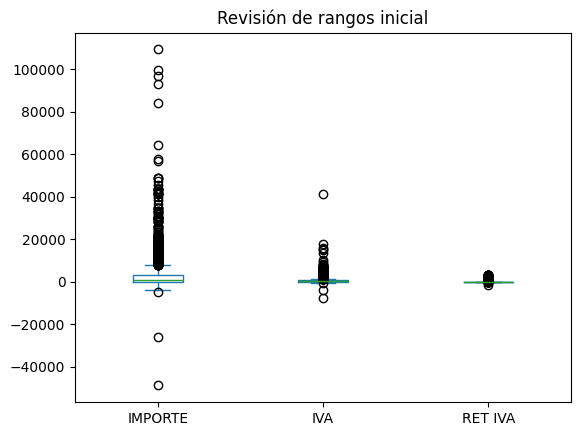

In [68]:
fig = plt.figure(figsize =(5, 3))
ax = df[['IMPORTE', 'IVA', 'RET IVA']].plot(kind='box', title='Revisión de rangos inicial')
plt.show()

##Claramente, hay un serio problema de outliers en este dataframe, con algunas compras muy extremas.

In [69]:
outcols = ['IMPORTE', 'IVA', 'RET IVA']

In [70]:
def tratamientopercentiles(y):
    inf_lim = y.mean() - 2*y.std()
    sup_lim = y.mean() + 2*y.std()
    print("Limite superior permitido", sup_lim)
    print("Limite inferior permitido", inf_lim)
    return inf_lim, sup_lim

In [71]:
df[df.index.duplicated()]

,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,Columna1
FECHA,,,,,,,,,,,,,,,,
2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,1.0,490.00,78.400000,0.0,0.0,568.40,568.40,I,Vigente,0.0
2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,1.0,195.00,31.200000,0.0,0.0,226.20,226.20,I,Vigente,0.0
2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.080000,0.0,0.0,12405.33,12405.33,I,Vigente,0.0
2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,1.0,0.00,519.824801,0.0,0.0,0.00,0.00,P,Vigente,0.0
2020-01-01,2860,F76E5BAB-1185-472D-A4FB-2A71115DF60A,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,1.0,0.00,519.824801,0.0,0.0,0.00,0.00,P,Vigente,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,32011 MAGNA,1.0,129.79,20.210000,0.0,0.0,150.00,150.00,I,Vigente,0.0
2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,1.0,2284.80,365.570000,0.0,0.0,2650.37,2650.37,I,Vigente,0.0
2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,REF VICTORIA GROSELLA 3 LT PET NR,1.0,163.79,26.210000,0.0,0.0,190.00,190.00,I,Vigente,0.0


In [72]:
y = df['IMPORTE']
inf_lim, sup_lim = tratamientopercentiles(y)
data_clean= df['IMPORTE'][(y <= sup_lim) & (y >= inf_lim)]
df['IMPORTE'] = data_clean

fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean) 
plt.title('IMPORTE')
plt.show()

Limite superior permitido 18338.166484714067
Limite inferior permitido -11745.626202449766


ValueError: cannot reindex on an axis with duplicate labels